# WEAT
---

ÏòÅÌôî ÏãúÎÜâÏãúÏä§ ÏΩîÌçºÏä§Î•º Ïù¥Ïö©ÌïòÏó¨ Word EmbeddingÏùÑ Íµ¨Ï∂ïÌïú ÌõÑ, WEAT scoreÎ•º Ï∏°Ï†ïÌïòÏó¨Î≥¥Ïûê. 

## Step 0. ÏÑ§Í≥Ñ
---

1. Word Embedding Íµ¨Ï∂ï
    - Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
    - ÌÜ†ÌÅ∞Ìôî : ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞Î•º Ïù¥Ïö©ÌïòÏó¨ ÌíàÏÇ¨Í∞Ä Î™ÖÏÇ¨Ïù∏ Îã®Ïñ¥ÎßåÏùÑ Ï∂îÏ∂úÌïòÏó¨ ÎßêÎ≠âÏπòÎ•º ÎßåÎì†Îã§.
    - Word2Vec ÌõàÎ†®
2. target, attribute Îã®Ïñ¥ÏÖã ÎßåÎì§Í∏∞
    - target/attribute Îç∞Ïù¥ÌÑ∞Ïùò TF-IDFÎ•º Íµ¨ÌïòÏó¨ Í∞Å Îç∞Ïù¥ÌÑ∞ Î≥ÑÎ°ú Ï§ëÏöîÎã®Ïñ¥ 15Í∞úÎ•º ÏÑ†Ï†ïÌïúÎã§.
3. WEAT Socre Ï∏°Ï†ï
    - 3ÏóêÏÑú ÏÑ†Ï†ïÎêú Îã®Ïñ¥ÏÖãÏóê ÎåÄÌïòÏó¨ WEAT ScoreÎ•º Í≥ÑÏÇ∞ÌïúÎã§.

#### Environment Setting

In [1]:
from gensim.models import Word2Vec
from konlpy.tag import Okt

import matplotlib as mpl 
import matplotlib.pyplot as plt

import numpy as np
from numpy import dot
from numpy.linalg import norm

import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

import os

/home/aiffel-dj1/anaconda3/envs/aiffel/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
import tensorflow as tf
def init_gpu():
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            # Currently, memory growth needs to be the same across GPUs
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs\n\n")
        except RuntimeError as e:
            # Memory growth must be set before GPUs have been initialized
            print(e, "\n\n")
        
init_gpu()

1 Physical GPUs, 1 Logical GPUs




## Step 1. Word Embedding Íµ¨Ï∂ï
---

### 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [7]:
synopsis_path = os.getenv('HOME')+'/workspace/aiffel-gd-nlp/GD06_WEAT/data/synopsis/synopsis.txt'

with open(synopsis_path, 'r') as file:
    for i in range(10):
        print(file.readline(), end='')

ÏÇ¨Ïö¥Îìú ÏóîÏßÄÎãàÏñ¥ ÏÉÅÏö∞(Ïú†ÏßÄÌÉú Î∂Ñ)Îäî ÏπòÎß§Ïóê Í±∏Î¶∞ Ìï†Î®∏Îãà(Î∞±ÏÑ±Ìù¨ Î∂Ñ)ÏôÄ
 Ï†äÏùÄ ÏãúÏ†à ÏÉÅÏ≤òÌïú Ìïú ÏïÑÎ≤ÑÏßÄ(Î∞ïÏù∏Ìôò Î∂Ñ), Í≥†Î™®(Ïã†Ïã†Ïï† Î∂Ñ)ÏôÄ Ìï®Íªò ÏÇ¥Í≥† ÏûàÎã§.
 Ïñ¥Îäê Í≤®Ïö∏ Í∑∏Îäî ÏßÄÎ∞© Î∞©ÏÜ°Íµ≠ ÎùºÎîîÏò§ PD ÏùÄÏàò(Ïù¥ÏòÅÏï† Î∂Ñ)Î•º ÎßåÎÇúÎã§.
 ÏûêÏó∞Ïùò ÏÜåÎ¶¨Î•º Ï±ÑÏßëÌï¥ ÌãÄÏñ¥Ï£ºÎäî ÎùºÎîîÏò§ ÌîÑÎ°úÍ∑∏Îû®ÏùÑ Ï§ÄÎπÑÌïòÎäî ÏùÄÏàòÎäî ÏÉÅÏö∞ÏôÄ ÎÖπÏùå Ïó¨ÌñâÏùÑ Îñ†ÎÇúÎã§.
 ÏûêÏó∞Ïä§Î†à Í∞ÄÍπåÏõåÏßÄÎäî Îëê ÏÇ¨ÎûåÏùÄ Ïñ¥Îäê ÎÇ†, ÏùÄÏàòÏùò ÏïÑÌååÌä∏ÏóêÏÑú Î∞§ÏùÑ Î≥¥ÎÇ∏Îã§.
 ÎÑàÎ¨¥ ÏâΩÍ≤å ÏÇ¨ÎûëÏóê Îπ†ÏßÑ Îëê ÏÇ¨Îûå... ÏÉÅÏö∞Îäî Ï£ºÏ≤¥Ìï† Ïàò ÏóÜÏùÑ Ï†ïÎèÑÎ°ú Í∑∏ÎÖÄÏóêÍ≤å Îπ®Î†§Îì†Îã§.
 Í∑∏Îü¨ÎÇò Í≤®Ïö∏Ïóê ÎßåÎÇú Îëê ÏÇ¨ÎûåÏùò Í¥ÄÍ≥ÑÎäî Î¥ÑÏùÑ ÏßÄÎÇò Ïó¨Î¶ÑÏùÑ ÎßûÏù¥ÌïòÎ©¥ÏÑú ÏÇêÍ±±Í±∞Î¶∞Îã§.
 Ïù¥Ìòº Í≤ΩÌóòÏù¥ ÏûàÎäî ÏùÄÏàòÎäî ÏÉÅÏö∞ÏóêÍ≤å Í≤∞ÌòºÌï† ÏÉùÍ∞ÅÏù¥ ÏóÜÎã§Î©∞ Î∂ÄÎã¥Ïä§Îü¨Ïö¥ ÌëúÏ†ïÏùÑ ÎÇ¥ÎπÑÏπúÎã§.
 "Ïñ¥ÎñªÍ≤å ÏÇ¨ÎûëÏù¥ Î≥ÄÌïòÎãà?..."ÎùºÍ≥† Î¨ªÎäî ÏÉÅÏö∞ÏóêÍ≤å ÏùÄÏàòÎäî Í∑∏Ï†Ä "Ìó§Ïñ¥Ï†∏" ÎùºÍ≥† Îã®Ìò∏ÌïòÍ≤å ÎßêÌïúÎã§.
 ÏòÅÏõêÌûà Î≥ÄÌï† Í≤É 

### 2. ÌÜ†ÌÅ∞Ìôî

In [5]:
okt = Okt()
tokenized = []

with open(synopsis_path, 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:
                res.append(w[0])    
        tokenized.append(res)

In [6]:
print(len(tokenized))

71156


### 3. Word2Vec ÌõàÎ†®

#### 1) Word2Vec Î™®Îç∏ ÌõàÎ†®
- ÏúÑÏóêÏÑú Ï∂îÏ∂úÌïú Í≤∞Í≥ºÎ•º Ïù¥Ïö©ÌïòÏó¨ Word2Vec Î™®Îç∏ÏùÑ ÌõàÎ†® ÏãúÌÇ®Îã§.

In [7]:
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  
model.wv.most_similar(positive=['ÏòÅÌôî'])

/home/aiffel-dj1/anaconda3/envs/aiffel/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


[('ÏûëÌíà', 0.8818110227584839),
 ('Îã§ÌÅêÎ©òÌÑ∞Î¶¨', 0.8405174612998962),
 ('ÎìúÎùºÎßà', 0.8194983005523682),
 ('ÏΩîÎØ∏Îîî', 0.7977256774902344),
 ('ÏòÅÌôîÎ°ú', 0.7942900061607361),
 ('ÌòïÏãù', 0.7832685112953186),
 ('Ï£ºÏ†ú', 0.7758829593658447),
 ('Í∞êÎèô', 0.7720778584480286),
 ('Ïä§ÌÜ†Î¶¨', 0.771220862865448),
 ('ÏÜåÏû¨', 0.76994389295578)]

In [18]:
model.wv.most_similar(positive=['ÏÇ¨Îûë'])

[('ÎßåÎÇ®', 0.7230604887008667),
 ('Ïù¥Î≥Ñ', 0.6978504657745361),
 ('ÌñâÎ≥µ', 0.6970791220664978),
 ('Ïó∞Ïï†', 0.6941631436347961),
 ('Ïï†Ï†ï', 0.6937086582183838),
 ('Ï≤´ÏÇ¨Îûë', 0.6934034824371338),
 ('ÏßÑÏã¨', 0.6905822157859802),
 ('Í∞ÄÏä¥', 0.6899749636650085),
 ('Ïö¥Î™Ö', 0.6864806413650513),
 ('ÌÜ†ÎßàÏäà', 0.686039924621582)]

In [19]:
model.wv.most_similar(positive=['Ïó∞Í∑π'])

[('ÏòÅÌôîÍ∞êÎèÖ', 0.9099433422088623),
 ('ÏïÑÌã∞Ïä§Ìä∏', 0.8847795724868774),
 ('Îç∞Î∑î', 0.8817678689956665),
 ('ÏòàÏà†Í∞Ä', 0.8810724020004272),
 ('ÎØ∏Ïà†', 0.8767175674438477),
 ('ÏòÅÍ∞ê', 0.8744353652000427),
 ('Î∞∞Ïö∞', 0.8717886805534363),
 ('ÏòàÏà†', 0.865924060344696),
 ('Ïò§ÌéòÎùº', 0.8644658327102661),
 ('ÏòÅÌôîÎ°ú', 0.862600564956665)]

In [20]:
model.wv.most_similar(positive=['ÎπÑÍ∑π'])

[('Í∑πÏ†Å', 0.8854536414146423),
 ('Í≤∞Îßê', 0.8440638184547424),
 ('ÎèôÏãú', 0.8376821279525757),
 ('ÎîúÎ†àÎßà', 0.8311975002288818),
 ('Í¥ëÍ∏∞', 0.8277866840362549),
 ('Í∞ÄÌï¥Ïûê', 0.8141322135925293),
 ('Ïπ®Î¨µ', 0.8105169534683228),
 ('Ï†ÑÍ∞ú', 0.808942437171936),
 ('ÏÜåÏö©ÎèåÏù¥', 0.8085982203483582),
 ('Î∞òÏ†Ñ', 0.8048672080039978)]

#### 2) Î™®Îç∏ Ï†ÄÏû• Î∞è Î∂àÎü¨Ïò§Í∏∞
- Î™®Îç∏ Ïû¨ÏÇ¨Ïö©ÏùÑ ÏúÑÌïòÏó¨ Î™®Îç∏ÏùÑ Ï†ÄÏû•ÌïòÍ≥† Ïù¥Î•º Î∂àÎü¨ÏôÄ ÏÇ¨Ïö©ÌïúÎã§.

In [4]:
model_path = os.getenv('HOME')+'/workspace/aiffel-gd-nlp/GD06_WEAT/model/w2v.model'

In [34]:
# Î™®Îç∏ Ï†ÄÏû•
model.save(model_path) # Î™®Îç∏ Ï†ÄÏû•

In [35]:
!ls ./model

w2v.model


In [5]:
# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model = Word2Vec.load(model_path)
model.wv.most_similar(positive=['ÏòÅÌôî'])

[('ÏûëÌíà', 0.8818110227584839),
 ('Îã§ÌÅêÎ©òÌÑ∞Î¶¨', 0.8405174612998962),
 ('ÎìúÎùºÎßà', 0.8194983005523682),
 ('ÏΩîÎØ∏Îîî', 0.7977256774902344),
 ('ÏòÅÌôîÎ°ú', 0.7942900061607361),
 ('ÌòïÏãù', 0.7832685112953186),
 ('Ï£ºÏ†ú', 0.7758829593658447),
 ('Í∞êÎèô', 0.7720778584480286),
 ('Ïä§ÌÜ†Î¶¨', 0.771220862865448),
 ('ÏÜåÏû¨', 0.76994389295578)]

## Step 2. target, attribute Îã®Ïñ¥ÏÖã ÎßåÎì§Í∏∞
---

WEAT scoreÎ•º Íµ¨Ìï† Îã®Ïñ¥ ÏÖãÏùÑ ÏÉùÏÑ±ÌïúÎã§. <br>
Ïù¥Îïå, targetÎäî ÏòÅÌôî Íµ¨Î∂Ñ, attributeÎäî ÏòÅÌôî Ïû•Î•¥Î°ú ÎëîÎã§.
- target : ÏòÅÌôî Íµ¨Î∂Ñ(ÏòàÏà†/ÏùºÎ∞ò)
- attribute : ÏòÅÌôî Ïû•Î•¥(SF/Í∞ÄÏ°±/Í≥µÏó∞/Í≥µÌè¨(Ìò∏Îü¨)/Í∏∞ÌÉÄ/Îã§ÌÅêÎ©òÌÑ∞Î¶¨/ÎìúÎùºÎßà/Î©úÎ°úÎ°úÎß®Ïä§/ÎÆ§ÏßÄÏª¨/ÎØ∏Ïä§ÌÑ∞Î¶¨/Î≤îÏ£Ñ/ÏÇ¨Í∑π/ÏÑúÎ∂ÄÍ∑π(Ïõ®Ïä§ÌÑ¥)/ÏÑ±Ïù∏Î¨º(ÏóêÎ°ú)/Ïä§Î¶¥Îü¨/Ïï†ÎãàÎ©îÏù¥ÏÖò/Ïï°ÏÖò/Ïñ¥ÎìúÎ≤§Ï≤ò/Ï†ÑÏüÅ/ÏΩîÎØ∏Îîî/ÌåêÌÉÄÏßÄ

Í∞Å Îã®Ïñ¥ ÏÖãÏùÄ TF-IDFÏùò Í≤∞Í≥º Í∞ÄÏû• Ï§ëÏöîÎèÑÍ∞Ä ÎÜíÏùÄ 15Í∞úÏùò Îã®Ïñ¥Î•º ÏÑ†Ï†ïÌïòÏó¨ Íµ¨ÏÑ±ÌïúÎã§.

### 1. Target

- Î™ÖÏÇ¨ Ï∂îÏ∂ú

In [6]:
art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'
data_dir_path = os.getenv('HOME')+'/workspace/aiffel-gd-nlp/GD06_WEAT/data/synopsis/'

def read_token(file_name):
    okt = Okt()
    result = []
    with open(data_dir_path + file_name, 'r') as fread: 
        print(file_name, 'ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0])) 
    return ' '.join(result)

In [7]:
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_gen.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.


- Îç∞Ïù¥ÌÑ∞Î•º TF-IDFÎ°ú ÌëúÌòÑ

In [8]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 41082)


In [9]:
print(vectorizer.vocabulary_['ÏòÅÌôî'])
print(vectorizer.get_feature_names()[23976])

23976
ÏòÅÌôî


In [10]:
print(vectorizer.vocabulary_['ÏÇ¨Îûë'])
print(vectorizer.get_feature_names()[16220])

16220
ÏÇ¨Îûë


In [11]:
m1 = X[0].tocoo()   # artÎ•º TF-IDFÎ°ú ÌëúÌòÑÌïú spart matrixÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§. 
m2 = X[1].tocoo()   # genÏùÑ TF-IDFÎ°ú ÌëúÌòÑÌïú spart matrixÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§. 

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #artÎ•º Íµ¨ÏÑ±ÌïòÎäî Îã®Ïñ¥Îì§ÏùÑ TF-IDFÍ∞Ä ÎÜíÏùÄ ÏàúÏúºÎ°ú Ï†ïÎ†¨Ìï©ÎãàÎã§. 
w2.sort(key=lambda x: x[1], reverse=True)   #genÏùÑ Íµ¨ÏÑ±ÌïòÎäî Îã®Ïñ¥Îì§ÏùÑ TF-IDFÍ∞Ä ÎÜíÏùÄ ÏàúÏúºÎ°ú Ï†ïÎ†¨Ìï©ÎãàÎã§. 

print('ÏòàÏà†ÏòÅÌôîÎ•º ÎåÄÌëúÌïòÎäî Îã®Ïñ¥Îì§:')
for i in range(100):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')

print('\n')
    
print('ÏùºÎ∞òÏòÅÌôîÎ•º ÎåÄÌëúÌïòÎäî Îã®Ïñ¥Îì§:')
for i in range(100):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')

ÏòàÏà†ÏòÅÌôîÎ•º ÎåÄÌëúÌïòÎäî Îã®Ïñ¥Îì§:
Í∑∏ÎÖÄ, ÏûêÏã†, ÏãúÏûë, ÏúÑÌï¥, ÏÇ¨Îûë, ÏÇ¨Îûå, ÏòÅÌôî, ÏπúÍµ¨, ÎÇ®Ïûê, Í∞ÄÏ°±, Ïù¥ÏïºÍ∏∞, ÎßàÏùÑ, ÏÇ¨Í±¥, ÎßàÏùå, ÏÑ∏ÏÉÅ, ÏïÑÎ≤ÑÏßÄ, ÏïÑÏù¥, ÏóÑÎßà, Î™®Îì†, Ïó¨Ïûê, ÎåÄÌïú, ÏÑúÎ°ú, Í≥ºÏó∞, Îã§Ïãú, ÏãúÍ∞Ñ, ÏïÑÎì§, ÏÜåÎÖÄ, ÏïÑÎÇ¥, Îã§Î•∏, ÏÇ¨Ïù¥, ÏòÅÌôîÏ†ú, ÏÑ∏Í≥Ñ, ÏÇ¨Ïã§, ÌïòÎÇò, Ï†êÏ†ê, ÎÇ®Ìé∏, Í∞êÎèÖ, Ïó¨Ìñâ, Ïù∏ÏÉù, Î∞úÍ≤¨, Î™®Îëê, ÏàúÍ∞Ñ, Ïö∞Î¶¨, Í∞ÄÏû•, ÎßàÏßÄÎßâ, ÏÉùÌôú, ÏïÑÎπ†, Î™®Ïäµ, ÌÜµÌï¥, Ï£ΩÏùå, Í∏∞Ïñµ, ÎπÑÎ∞Ä, ÌïôÍµê, ÏùåÏïÖ, ÌïúÌé∏, ÏÜåÎÖÑ, ÏÉùÍ∞Å, ÎèÑÏãú, Î™ÖÏùò, ÏÇ¨Í≥†, Í≤∞Ìòº, Ï†ÑÏüÅ, ÎïåÎ¨∏, ÏúÑÍ∏∞, Ïù¥Ï†ú, ÏµúÍ≥†, Ïù¥Ïûê, Í≥ºÍ±∞, ÏùºÏÉÅ, Í≤ΩÏ∞∞, ÏÉÅÌô©, Í∞ÑÎã§, ÎØ∏Íµ≠, Í≤∞Ïã¨, Ïö¥Î™Ö, ÌòÑÏã§, Í¥ÄÍ≥Ñ, ÏßÄÍ∏à, Îã®Ìé∏, Ïó¨Ïù∏, ÌïòÎ£®, Ïù¥Î¶Ñ, Ïù¥ÌõÑ, Ï§ÄÎπÑ, Ïù∏Í∞Ñ, Í∞êÏ†ï, ÎßåÎÇú, Íµ≠Ï†ú, Ï≤òÏùå, Ï∂©Í≤©, ÏÇ¥Ïù∏, ÎàÑÍµ¨, ÎèôÏïà, Ï°¥Ïû¨, Í∑∏Î¶∞, Ïñ¥Î®∏Îãà, Ïó∞Ïù∏, Í≥ÑÏÜç, ÎèôÏÉù, ÏûëÌíà, 

ÏùºÎ∞òÏòÅÌôîÎ•º ÎåÄÌëúÌïòÎäî Îã®Ïñ¥Îì§:
ÏûêÏã†, Í∑∏ÎÖÄ, ÏòÅÌôîÏ†ú, ÏúÑÌï¥, ÏÇ¨Îûå, ÏãúÏûë, Íµ≠Ï†ú, ÏòÅÌôî, ÏπúÍµ¨, ÏÇ¨Îûë, ÎÇ®Ïûê, Ïù¥ÏïºÍ∏∞, Î

- Ï§ëÎ≥µ Ï†úÍ±∞

Îã®Ïñ¥Ïùò Ï§ëÎ≥µÏùÑ Ï†úÍ±∞ÌïòÍ≥† TF-IDFÍ∞Ä ÎÜíÏùÄ ÏÉÅÏúÑ 15Í∞úÎ•º Ï∂îÏ∂úÌïúÎã§.<br>
Ïù¥Îïå, Ï§ëÎ≥µÏùÑ Ï†úÍ±∞ ÌïúÎã§Îäî Í≤ÉÏùÄ ÏòàÏà†ÏòÅÌôîÎ•º ÎåÄÌëúÌïòÎäî Îã®Ïñ¥Îäî ÏùºÎ∞òÏòÅÌôîÎ•º ÎåÄÌëúÌïòÎäî Îã®Ïñ¥Ïóê Ìè¨Ìï®ÎêòÏßÄ ÏïäÎèÑÎ°ù ÌïúÎã§Îäî ÏùòÎØ∏Î•º Í∞ÄÏßÑÎã§.

In [12]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

# w1ÏóêÎßå ÏûàÍ≥† w2ÏóêÎäî ÏóÜÎäî, ÏòàÏà†ÏòÅÌôîÎ•º Ïûò ÎåÄÌëúÌïòÎäî Îã®Ïñ¥Î•º 15Í∞ú Ï∂îÏ∂úÌïúÎã§.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2ÏóêÎßå ÏûàÍ≥† w1ÏóêÎäî ÏóÜÎäî, ÏùºÎ∞òÏòÅÌôîÎ•º Ïûò ÎåÄÌëúÌïòÎäî Îã®Ïñ¥Î•º 15Í∞ú Ï∂îÏ∂úÌïúÎã§.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [13]:
print(target_art)

['ÏïÑÎπ†', 'ÏùåÏïÖ', 'Í≤∞Ïã¨', 'Ïö¥Î™Ö', 'ÏßÄÍ∏à', 'Ïó¨Ïù∏', 'Ïù¥Î¶Ñ', 'Ïù¥ÌõÑ', 'Ï§ÄÎπÑ', 'Í∞êÏ†ï', 'ÎßåÎÇú', 'Ï≤òÏùå', 'Ï∂©Í≤©', 'ÎàÑÍµ¨', 'Í∑∏Î¶∞']


In [14]:
print(target_gen)

['ÏÑúÏö∏', 'Ïï†ÎãàÎ©îÏù¥ÏÖò', 'Ïó¨ÏÑ±', 'Í∞ÄÏßÄ', 'Ï£ºÏù∏Í≥µ', 'ÎåÄÌï¥', 'Ïó∞Ï∂ú', 'ÏÇ¨Ìöå', 'Îã§ÌÅêÎ©òÌÑ∞Î¶¨', 'Î∂ÄÎ¨∏', 'ÏÑπÏä§', 'Î∞îÎ°ú', 'ÏùòÎèÑ', 'Í≥ÑÌöç', 'Ï†ïÏ≤¥']


- ÏãúÍ∞ÅÌôî

In [42]:
def show_pca(model, A_label, B_label, A_name, B_name): 
    A = np.array([model.wv[label] for label in A_label])
    B = np.array([model.wv[label] for label in B_label])
    
    pca = PCA(n_components=2)
    pc_A = pca.fit_transform(A)
    pc_B = pca.fit_transform(B)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(pc_A[:,0], pc_A[:,1], c='blue', label=A_name)
    ax.scatter(pc_B[:,0], pc_B[:,1], c='red', label=B_name)
    ax.legend()
    
    # annotation
    plt.rc('font', family='Noto Sans CJK JP')
    for i, label in enumerate(A_label):
        ax.annotate(label, (pc_A[:,0][i]+0.2, pc_A[:,1][i]))
        
    for i, label in enumerate(B_label):
        ax.annotate(label, (pc_B[:,0][i]+0.2, pc_B[:,1][i]))
    
    plt.show()

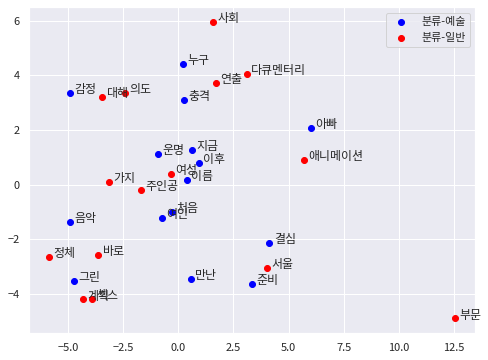

In [43]:
show_pca(model, target_art, target_gen, "Î∂ÑÎ•ò-ÏòàÏà†", "Î∂ÑÎ•ò-ÏùºÎ∞ò")

Îëê ÏòÅÌôîÎ•º Î∂ÑÎ•òÎ•º ÎåÄÌëúÌïòÎäî Îã®Ïñ¥Îì§Ïùò ÏúÑÏπòÍ∞Ä Í∑∏Î†áÍ≤å ÌÅ¨Í≤å Í∞àÎ¶¨ÏßÄ ÏïäÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

### 2. Attribute

- Î™ÖÏÉÅ Ï∂îÏ∂ú

In [17]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', 'Í∞ÄÏ°±', 'Í≥µÏó∞', 'Í≥µÌè¨(Ìò∏Îü¨)', 'Í∏∞ÌÉÄ', 'Îã§ÌÅêÎ©òÌÑ∞Î¶¨', 'ÎìúÎùºÎßà', 'Î©úÎ°úÎ°úÎß®Ïä§', 'ÎÆ§ÏßÄÏª¨', 'ÎØ∏Ïä§ÌÑ∞Î¶¨', 'Î≤îÏ£Ñ', 'ÏÇ¨Í∑π', 'ÏÑúÎ∂ÄÍ∑π(Ïõ®Ïä§ÌÑ¥)',
         'ÏÑ±Ïù∏Î¨º(ÏóêÎ°ú)', 'Ïä§Î¶¥Îü¨', 'Ïï†ÎãàÎ©îÏù¥ÏÖò', 'Ïï°ÏÖò', 'Ïñ¥ÎìúÎ≤§Ï≤ò', 'Ï†ÑÏüÅ', 'ÏΩîÎØ∏Îîî', 'ÌåêÌÉÄÏßÄ']

In [18]:
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_family.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_show.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_horror.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_etc.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_documentary.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_drama.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_romance.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_musical.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_mystery.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_crime.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_historical.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_western.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_adult.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_thriller.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_animation.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_action.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_adventure.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_war.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_comedy.txt ÌååÏù

- Îç∞Ïù¥ÌÑ∞Î•º TF-IDFÎ°ú ÌëúÌòÑ

In [19]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 42191)


In [20]:
m = [X[i].tocoo() for i in range(X.shape[0])]
w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
    
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 20):
        if vectorizer.get_feature_names()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: ÏúÑÌï¥, ÏûêÏã†, ÏßÄÍµ¨, ÏãúÏûë, ÏÇ¨Îûå, Ïù∏Î•ò, Ïù∏Í∞Ñ, ÎØ∏Îûò, Ïö∞Ï£º, Í∑∏ÎÖÄ, Î°úÎ¥á, ÏÑ∏Í≥Ñ, Î™®Îì†, Î∞ïÏÇ¨, Ïö∞Ï£ºÏÑ†, Ïô∏Í≥Ñ, Ï°¥Ïû¨, ÏÑ∏ÏÉÅ, Î∞úÍ≤¨, ÌñâÏÑ±, 
Í∞ÄÏ°±: ÏóÑÎßà, ÏïÑÎπ†, Í∞ÄÏ°±, ÏòÅÌôîÏ†ú, ÏûêÏã†, ÏúÑÌï¥, ÏπúÍµ¨, ÏïÑÏ£ºÎ•¥, ÏïÑÎ≤ÑÏßÄ, ÏãúÏûë, Í∑∏ÎÖÄ, ÏïÑÎì§, ÎßàÏùÑ, Íµ≠Ï†ú, ÎÇôÌÉÄ, Ìï†Î®∏Îãà, Ïî®Ï†úÏù¥, ÎèôÍµ¨, ÏÇ¨Îûë, ÏïÑÏù¥, 
Í≥µÏó∞: Ïò§ÌéòÎùº, ÏÇ¨Îûë, ÌÜ†Ïä§Ïπ¥, Ïã§Ìô©, Ïò¨Î†à, ÏûêÏã†, Ïπ¥Î∞î, Í∑∏ÎÖÄ, Í≥µÏó∞, Ïò§ÌÖîÎ°ú, Î¶¨Í≥®Î†àÌÜ†, Î∞±Ïûë, ÌîÑÎ†à, Î≤†Î•¥Îîî, ÏúÑÌï¥, Ïπ¥Î•¥Ìîº, ÎπÑÎ∞î, ÏôïÏûê, ÏΩòÏÑúÌä∏, Î∞±ÏûëÎ∂ÄÏù∏, 
Í≥µÌè¨(Ìò∏Îü¨): ÏãúÏûë, ÏúÑÌï¥, ÏÇ¨Îûå, ÏûêÏã†, ÏπúÍµ¨, Í∑∏ÎÖÄ, ÏÇ¨Í±¥, Í≥µÌè¨, Î∞úÍ≤¨, Ï£ΩÏùå, ÎßàÏùÑ, Í∞ÄÏ°±, ÏïÖÎ†π, ÎÇ®Ïûê, Ï¢ÄÎπÑ, ÏòÅÌôî, ÏÇ¨Ïã§, ÏÜåÎÖÄ, ÌïòÎÇò, ÏÇ¥Ïù∏, 
Í∏∞ÌÉÄ: ÏòÅÌôîÏ†ú, Íµ≠Ï†ú, ÏÑúÏö∏, Îã®Ìé∏, ÏòÅÌôî, ÏûêÏã†, ÏÇ¨Îûå, Ïù¥ÏïºÍ∏∞, Í∑∏ÎÖÄ, ÎÇ®Ïûê, ÏúÑÌï¥, ÏãúÏûë, ÏÇ¨Îûë, Îâ¥ÎØ∏ÎîîÏñ¥, ÌéòÏä§Ìã∞Î≤å, Ïó¨Ïûê, ÎåÄÌïú, ÎèÖÎ¶Ω, ÏπúÍµ¨, ÏûëÌíà, 
Îã§ÌÅêÎ©òÌÑ∞Î¶¨: ÏòÅÌôîÏ†ú, ÏòÅÌôî, Îã§ÌÅê, Íµ≠Ï†ú, Îã§ÌÅêÎ©òÌÑ∞Î¶¨, ÏÇ¨Îûå, Ïù¥ÏïºÍ∏

In [21]:
def show_pca(model, words, labels): 
    def get_cmap(n, name='hsv'):
        return plt.cm.get_cmap(name, n)

    values = [ np.array([model.wv[w] for w in ws]) for ws in words ]
    
    pca = PCA(n_components=2)
    pc_res = [ pca.fit_transform(value) for value in values ]
    
    fig, ax = plt.subplots(figsize=(10, 7))
    cmap = get_cmap(len(words), 'jet')
    for i, pc_cur in enumerate(pc_res):
        ax.scatter(pc_cur[:,0], 
                   pc_cur[:,1], 
                   c=np.array([cmap(i)]), 
                   label=labels[i])
    
    plt.rc('font', family='Noto Sans CJK JP')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.show()

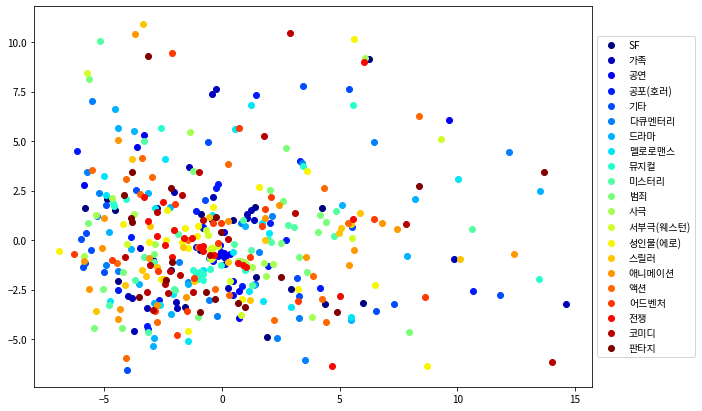

In [22]:
show_pca(model, attributes, genre_name)

## Step 3. WEAT Score Ï∏°Ï†ï
---

target_AÎäî ÏòàÏà†ÏòÅÌôî, target_BÎäî ÏùºÎ∞òÏòÅÌôîÎ°ú Í≥†Ï†ïÌïòÍ≥† attributeÎ•º Ï†ÑÏ≤¥ Ïû•Î•¥Î°úÌïòÏó¨  WEAT ScoreÎ•º Í≥ÑÏÇ∞Ìï¥ Î≥¥Ïûê.

### 1. WEAT Score Í≥ÑÏÇ∞ Ìï®Ïàò Ï†ïÏùò

In [23]:
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B

def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

### 2. WEAT Score Í≥ÑÏÇ∞

In [24]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]
np.array(matrix).shape

(21, 21)

In [25]:
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)
        matrix[j][i] = matrix[i][j]  * -1

### 3. Í≥ÑÏÇ∞ Í≤∞Í≥º ÌôïÏù∏

- WEAT Score Ìï¥ÏÑù
    - Î≥ÄÏàò
        - Îëê ÌÉÄÍ≤ü X, Y
        - Îëê ÌÉÄÍ≤üÏóêÏÑú Î∂ÑÌè¨Ïùò Ìé∏Ìñ•ÏÑ±ÏùÑ ÌôïÏù∏ÌïòÍ≥†Ïûê ÌïòÎäî Îëê ÌäπÏßï(attibute) A, B
    - ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ(cosine similarity)
        - Îëê Îã®Ïóê Î≤°ÌÑ∞ aÏôÄ b ÏÇ¨Ïù¥Ïùò ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑÎäî Îëê Îã®Ïñ¥ ÏÇ¨Ïù¥Ïùò ÏùòÎØ∏Î°†Ï†Å Ïú†ÏÇ¨ÎèÑÎ•º ÎÇòÌÉÄÎÇ∏Îã§.
        - $$cos(\theta) = \frac{a\cdot b}{||a||||b||}$$
        - ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑÎäî -1ÏóêÏÑú 1 ÏÇ¨Ïù¥Ïùò Í∞íÏùÑ Í∞ÄÏßÄÎ©¥ 1Ïóê Í∞ÄÍπåÏö¥ÏàòÎ°ù Ïú†ÏÇ¨ÎèÑÍ∞Ä ÎÜíÎã§Í≥† ÎßêÌï† Ïàò ÏûàÎã§.
    - $s(w, A, B)$
        - $$s(w, A, B) = {\rm{mean}_{\it a \in A}cos(\it\overrightarrow{w}, \overrightarrow{a}) - \rm{mean}_{\it b \in B}{cos(\it\overrightarrow{w}, \overrightarrow{b})}}$$
        - ÌÉÄÍ≤üÏùò Îã®Ïñ¥($w$)ÏôÄ A, BÏóê Îì±Ïû•ÌïòÎäî Îã®Ïñ¥Îì§Í≥ºÏùò Ïú†ÏÇ¨ÎèÑÏùò ÌèâÍ∑†Ïùò Ï∞®Ïù¥
        - ÌÉÄÍ≤üÏùò Îã®Ïñ¥($w$)Í∞Ä A, B Ï§ë Ïñ¥Îäê Ï™ΩÏúºÎ°ú ÏùòÎØ∏Î°†Ï†ÅÏúºÎ°ú Îçî Í∞ÄÍπåÏö¥ÏßÄ/A-BÏóê ÎåÄÌï¥ Í∞ÄÏßÄÎäî Ìé∏Ìñ•ÏÑ±ÏùÑ Í≥ÑÏÇ∞Ìïú Í≤É
        - ÏñëÏùò Î±°Ìñ•ÏúºÎ°ú ÌÅ¥ÏàòÎ°ù $w$Îäî AÏóê Í∞ÄÍπùÍ≥†, ÏùåÏùò Î∞©Ìñ•ÏúºÎ°ú ÌÅ¥ÏàòÎ°ù BÏóê Í∞ÄÍπùÎã§.
    - WEAT Score
        - ÌÉÄÍ≤ü Îç∞Ïù¥ÌÑ∞ÏÖã X, YÏÉÅÏóê ÎÇ¥Ìè¨Îêú ÌäπÏßï A, BÏóê ÎåÄÌïú Ìé∏Ìñ•ÏÑ± Ï†êÏàò
        - $$\frac{\rm{mean}_{\it x \in X}s(x,A, B) - \rm{mean}_{\it y \in Y}s(y,A, B)}{\rm{std}_{\it w \in X \cup Y}s(w, A, B)}$$
        - Î∂ÑÎ™®Í∞Ä ÌÉÄÍ≤ü(X, Y)Ïóê Ìè¨Ìï®ÎêòÎäî Î™®Îì† Îã®Ïñ¥Ïóê ÎåÄÌïú Ïú†ÏÇ¨ÎèÑ Ï∞®Ïù¥Ïùò ÌëúÏ§ÄÌé∏Ï∞®Ïù¥ÎØÄÎ°ú Ïù¥Î•º ÌÜµÌïòÏó¨ Î∂ÑÏûêÏùò Í∞íÏùÑ Ï†ïÍ∑úÌôîÌïòÎäî Ìö®Í≥ºÎ•¥ Í∞ÄÏßÑÎã§.
        - Î∂ÑÏûê Î∂ÄÎ∂ÑÏùÄ ÌÉÄÍ≤ü(X, Y)Ïóê ÏÜçÌïòÎäî Í∞Å Îã®Ïñ¥  ùë• ,  ùë¶ Îì§Ïù¥ A, BÏóê ÎåÄÌï¥ Í∞ÄÏßÄÎäî Ìé∏Ìñ•ÏÑ±ÏùÑ Îã§Ïãú ÌèâÍ∑† ÎÇ¥ÏÑú Î∫Ä Ï∞®Ïù¥Ïù¥Îã§. Ï¶â, XÏóê ÏÜçÌïòÎäî Îã®Ïñ¥Îì§Í≥º YÏóê ÏÜçÌïòÎäî Îã®Ïñ¥Îì§Ïù¥ A, BÏóê ÎåÄÌï¥ Í∞ÄÏßÄÎäî Ìé∏Ìñ•ÏÑ±Ïùò Ï†ïÎèÑÍ∞Ä ÎöúÎ†∑Ïù¥ Ï∞®Ïù¥ ÎÇ†ÏàòÎ°ù Ïù¥ WEAT score ÏãùÏùò Î∂ÑÏûêÍ∞íÏùò Ï†àÎåìÍ∞íÏùÄ Ïª§ÏßÄÍ≤å ÎêúÎã§. 
       - Í≤ΩÏö∞Î•º ÎÇòÎàÑÏñ¥ ÏÉùÍ∞ÅÌï¥ Î≥∏Îã§Î©¥,
           - XÍ∞Ä AÏóê ÎåÄÌïú Ìé∏Ìñ•ÏÑ±Ïù¥ ÎÜíÍ≥† YÍ∞Ä BÏóê ÎåÄÌïú Ìé∏Ìñ•ÏÑ±Ïù¥ ÎÜíÎã§Î©¥, WEAT scoreÎäî ÏñëÏàò Í∞íÏùÑ Í∞ÄÏßÄÍ≤å ÎêòÍ≥† Ïù¥Îäî Ìé∏Ìñ•ÏÑ±Ïù¥ ÌÅ¥ÏàòÎ°ù Ïª§ÏßÄÍ≤å ÎêúÎã§.
           - XÍ∞Ä AÏóê ÎåÄÌïú Ìé∏Ìñ•ÏÑ±Ïù¥ ÎÜíÍ≥† YÎèÑ AÏóê ÎåÄÌïú Ìé∏Ìñ•ÏÑ±Ïù¥ ÎÜíÎã§Î©¥, WEAT scoreÎäî 0Ïóê Í∞ÄÍπåÏö¥ Í∞íÏùÑ Í∞ÄÏßÄÍ≤å ÎêòÍ≥† Ïù¥Îäî ÎëòÏù¥ Í∞ÄÏßÄÎäî Ìé∏Ìñ•ÏÑ±Ïù¥ ÎπÑÏä∑Ìï†ÏàòÎ°ù 0Ïóê Í∑ºÏÇ¨Ìï† Í≤ÉÏù¥Îã§.
           - XÍ∞Ä BÏóê ÎåÄÌïú Ìé∏Ìñ•ÏÑ±Ïù¥ ÎÜíÍ≥† YÍ∞Ä AÏóê ÎåÄÌïú Ìé∏Ìñ•ÏÑ±Ïù¥ ÎÜíÎã§Î©¥, WEAT scoreÎäî ÏùåÏàò Í∞íÏùÑ Í∞ÄÏßÄÍ≤å ÎêòÍ≥† Ïù¥Îäî Ìé∏Ìñ•ÏÑ±Ïù¥ ÌÅ¥ÏàòÎ°ù Ïª§ÏßÄÍ≤å ÎêúÎã§.

- WEAT score Ï†êÏàò ÌôïÏù∏

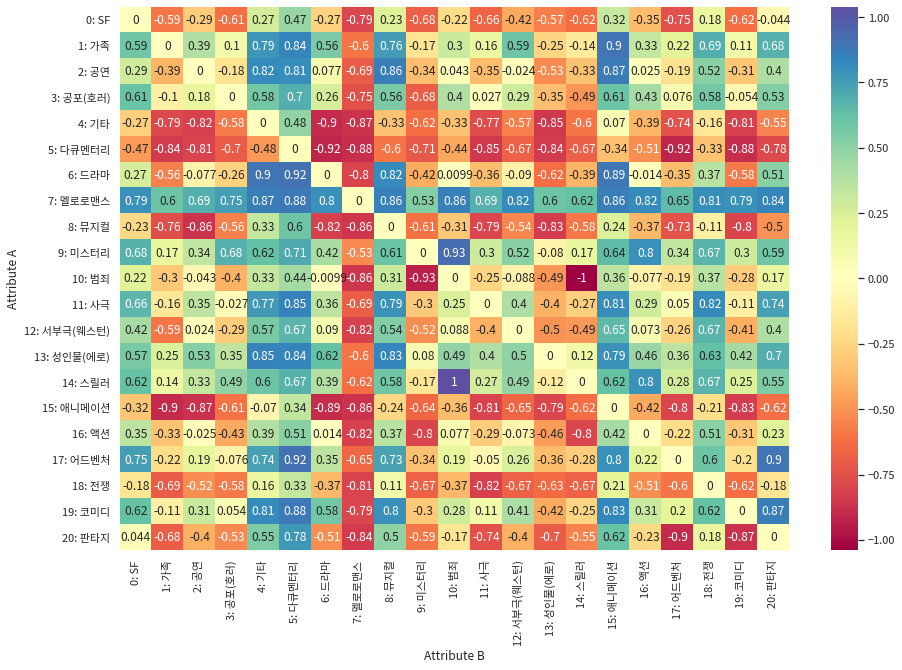

In [50]:
np.random.seed(0)
sns.set(font="Noto Sans CJK JP")

genre_name = [f'{i}: {name}' for i, name in enumerate(genre_name)]

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(matrix, 
                 xticklabels=genre_name, 
                 yticklabels=genre_name,
                 annot=True,
                 cmap='Spectral')
ax.set_ylabel('Attribute A')
ax.set_xlabel('Attribute B')
plt.show()

ÌûàÌä∏ÎßµÏúºÎ°ú ÏÇ¥Ìé¥Î≥∏ Í≤∞Í≥º Í∞íÎì§Ïù¥ -1~1 ÏÇ¨Ïù¥Î°ú Î∂ÑÌè¨ÌïòÎ©∞ Ìé∏Ìñ•ÏÑ±Ïù¥ Í∑∏Î†áÍ≤å ÎßéÏù¥ ÎÜíÏßÄÎäî ÏïäÏùÄ Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.<br>
Í±îÏ§ëÏóê ÎÜíÏùÄ ÏàòÏπòÎ•º Î≥¥Ïù¥Îäî Ï†àÎåÄÍ∞íÏù¥ 0.9 Ïù¥ÏÉÅÏù∏ Îç∞Ïù¥ÌÑ∞Îì§Ïùò Ï°∞Ìï©Ïóê ÎåÄÌïòÏó¨ PCAÎ•º Ï†ÅÏö©ÌïòÏó¨ Îã®Ïñ¥ Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï¥ Î≥¥Ïûê.

- WEAT ScoreÍ∞Ä Í∏∞Ï§ÄÏπò(0.9) Ïù¥ÏÉÅÏù¥ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú Î≤°ÌÑ∞ ÏãúÍ∞ÅÌôî

In [47]:
def show_pca(X, Y, A, B): 
    pca = PCA(n_components=2)
    pc_A = pca.fit_transform(A)
    pc_B = pca.fit_transform(B)
    pc_X = pca.fit_transform(X)
    pc_Y = pca.fit_transform(Y)
    
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.scatter(pc_A[:,0],pc_A[:,1], c='blue', label='A')
    ax.scatter(pc_B[:,0],pc_B[:,1], c='red', label='B')
    ax.scatter(pc_X[:,0],pc_X[:,1], c='skyblue', label='X')
    ax.scatter(pc_Y[:,0],pc_Y[:,1], c='pink', label='Y')
    ax.legend()
    
    # annotation
    plt.rc('font', family='Noto Sans CJK JP')
    plt.show()

Ï†àÎåÄÍ∞íÏù¥ 0.9 Ïù¥ÏÉÅÏúºÎ°ú ÎÇòÏò® Í≤ÉÏùÑ Ï†ïÎ¶¨ÌïòÎ©¥ Îã§ÏùåÍ≥º Í∞ôÎã§.

In [62]:
for i in range(len(matrix)):
    for j in range(i+1, len(genre_name)):
        val = matrix[i][j]
        if val >= 0.9 or val <= -0.9:
            print(f'{genre_name[i]}, {genre_name[j]} : {val}')

5: Îã§ÌÅêÎ©òÌÑ∞Î¶¨, 6: ÎìúÎùºÎßà : -0.9153227806091309
5: Îã§ÌÅêÎ©òÌÑ∞Î¶¨, 17: Ïñ¥ÎìúÎ≤§Ï≤ò : -0.9164107441902161
9: ÎØ∏Ïä§ÌÑ∞Î¶¨, 10: Î≤îÏ£Ñ : 0.9304545521736145
10: Î≤îÏ£Ñ, 14: Ïä§Î¶¥Îü¨ : -1.0395952463150024


- X: ÏòàÏà†ÏòÅÌôî, Y: ÏùºÎ∞òÏòÅÌôî, A: Îã§ÌÅêÎ©òÌÑ∞Î¶¨, B: ÎìúÎùºÎßà

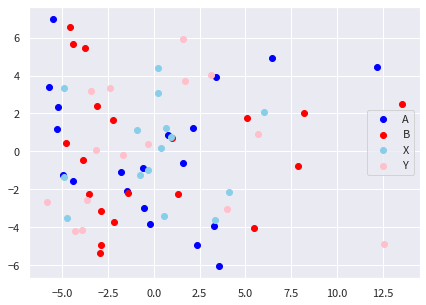

In [63]:
A = np.array([model.wv[label] for label in attributes[5]])
B = np.array([model.wv[label] for label in attributes[6]])
X = np.array([model.wv[label] for label in target_art])
Y = np.array([model.wv[label] for label in target_gen])
show_pca(X, Y, A, B)

- X: ÏòàÏà†ÏòÅÌôî, Y: ÏùºÎ∞òÏòÅÌôî, A: Îã§ÌÅêÎ©òÌÑ∞Î¶¨, B: Ïñ¥ÎìúÎ≤§Ï≤ò

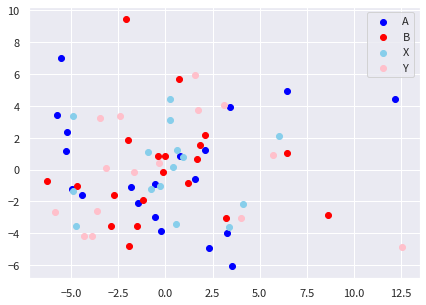

In [64]:
A = np.array([model.wv[label] for label in attributes[5]])
B = np.array([model.wv[label] for label in attributes[17]])
show_pca(X, Y, A, B)

- X: ÏòàÏà†ÏòÅÌôî, Y: ÏùºÎ∞òÏòÅÌôî, A: ÎØ∏Ïä§ÌÑ∞Î¶¨, B: Î≤îÏ£Ñ

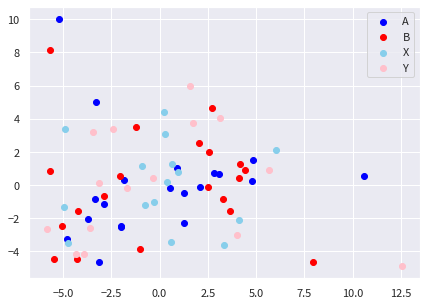

In [65]:
A = np.array([model.wv[label] for label in attributes[9]])
B = np.array([model.wv[label] for label in attributes[10]])
show_pca(X, Y, A, B)

- X: ÏòàÏà†ÏòÅÌôî, Y: ÏùºÎ∞òÏòÅÌôî, A: Î≤îÏ£Ñ, B: Ïä§Î¶¥Îü¨

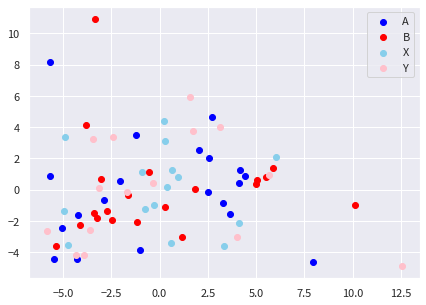

In [66]:
A = np.array([model.wv[label] for label in attributes[10]])
B = np.array([model.wv[label] for label in attributes[14]])
show_pca(X, Y, A, B)

WEAT Score Í∞íÏù¥ ÏñëÏàòÏù∏ Í≤ΩÏö∞ÏóêÎäî X-A, Y-BÍ∞Ä ÏÇ¨Ïù¥Ïùò Ìé∏Ìñ•ÏÑ±Ïù¥ ÎÜíÍ≥†, ÏùåÏàòÏù∏ Í≤ΩÏö∞ÏóêÎäî X-B, Y-A ÏÇ¨Ïù¥Ïùò Ìé∏Ìñ•ÏÑ±Ïù∏ ÎÜíÎã§Í≥†  Î≥º Ïàò ÏûàÎã§. Ï¶â ÏúÑÏùò Í≤ΩÏö∞ Ï§ë 3Î≤àÏß∏Ïù∏ [X: ÏòàÏà†ÏòÅÌôî, Y: ÏùºÎ∞òÏòÅÌôî, A: ÎØ∏Ïä§ÌÑ∞Î¶¨, B: Î≤îÏ£Ñ]ÏôÄ ÎÇòÎ®∏ÏßÄ PCAÏùò Í≤∞Í≥ºÍ∞Ä Î∞òÎåÄÎ°ú ÎÇòÏò§Îäî Í≤ÉÏù¥ Ïù¥ÏÉÅÏ†ÅÏù¥Îã§. ÌïòÏßÄÎßå, Ïã§Ï†ú Í≤∞Í≥ºÎ°úÎäî Ïñ¥Îñ§ ÏßëÎã®Ïù¥ Îã§Î•∏ ÏßëÎã®Í≥º Í∏¥Î∞ÄÌïòÍ≥† Î∂ôÏñ¥ÏûàÎã§Í≥† ÎßêÌïòÍ∏∞ Ïï†Îß§Ìï† Ï†ïÎèÑÎ°ú Î≤°ÌÑ∞Îì§Ïù¥ ÏÇ∞Í∞úÎêòÏñ¥ ÏûàÎã§. WEAT Score ÏûêÏ≤¥Ïùò ÌÅ¨Í∏∞Í∞Ä ÌÅ¨ÏßÄ ÏïäÏïÑ ÎöúÎ†∑Ìïú Íµ¨Î∂ÑÏùÑ ÎßåÎì§Ïñ¥ÏßÄÏßÄ ÏïäÏùÄ Í≤ÉÏúºÎ°ú Ï∂îÏ†ïÎêúÎã§.

## STEP 4. Í≤∞Î°†
---

### 1. ÌîÑÎ°úÏ†ùÌä∏ ÌèâÍ∞Ä

1. Ï£ºÏñ¥ÏßÑ ÏòÅÌôî ÏΩîÌçºÏä§Î•º Î∞îÌÉïÏúºÎ°ú ÏõåÎìúÏûÑÎ≤†Îî© Î™®Îç∏ÏùÑ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú ÎßåÎì§ÏóàÎã§. <br>ÏõåÎìúÏûÑÎ≤†Îî©Ïùò most_similar() Î©îÏÜåÎìú Í≤∞Í≥ºÍ∞Ä ÏùòÎØ∏ÏÉÅ Î∞îÎ•¥Í≤å ÎÇòÏôîÎã§.
    - ÏõåÎìú ÏûÑÎ≤†Îî© Î™®Îç∏Ïù¥ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú ÎßåÎì§Ïñ¥Ï°åÎã§.
    - most_similar Ìï®ÏàòÏùò Ï∂úÎ†• Í≤∞Í≥º, ÏòÅÌôîÎäî ÏûëÌíà, ÏÇ¨ÎûëÏùò Í≤ΩÏö∞Îäî ÎßåÎÇ®, Ïó∞Í∑πÏùò Í≤ΩÏö∞Îäî ÏòÅÌôîÍ∞êÎèÖ, ÎπÑÍ∑πÏùò Í≤ΩÏö∞Îäî Í∑πÏ†ÅÏù¥ Ïú†ÏÇ¨Ìïú Îã®Ïñ¥Í∞Ä ÎÇòÏôîÎã§. ÏùòÎØ∏ÏÉÅÏúºÎ°ú Ïò¨Î∞îÎ•¥Í≤å Ï∂úÎ†•Îêú Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.
2. ÏòÅÌôî Íµ¨Î∂Ñ, Ïû•Î•¥Î≥ÑÎ°ú target, attributeÏóê ÎåÄÌïú ÎåÄÌëúÏÑ±ÏûàÎäî Îã®Ïñ¥ ÏÖãÏùÑ ÏÉùÏÑ±ÌïòÏòÄÎã§.<br> ÌÉÄÎãπÌïú Î∞©Î≤ïÎ°†ÏùÑ ÌÜµÌï¥ Ï§ëÎ≥µÏù¥ Ïûò Ï†úÍ±∞ÎêòÍ≥† Í∞úÎÖêÏ∂ïÏùÑ ÏùòÎØ∏Ï†ÅÏúºÎ°ú Ïûò ÎåÄÌëúÌïòÎäî Îã®Ïñ¥ ÏÖãÏù¥ ÎßåÎì§Ïñ¥Ï°åÎã§.
    - targetÏóê ÎåÄÌï¥ÏÑúÎäî ÏÑúÎ°úÏùò Ï§ëÎ≥µÏùÑ Ï†úÍ±∞ÌïòÏó¨ Ï£ºÏóàÍ≥†, attributeÏóê ÎåÄÌï¥Îäî Ï§ëÎ≥µÎ•†Ïù¥ ÎÇÆÏïÑ Ï§ëÎ≥µ Ï†úÍ±∞Î•º ÏãúÎèÑÌïòÏßÄ ÏïäÏïòÎã§.
    - ÎåÄÌëúÏÑ± ÏûàÎäî Îã®Ïñ¥ÏÖãÏù¥ ÏÉùÏÑ±ÎêòÏóàÎã§.
        -  SF: ÏúÑÌï¥, ÏûêÏã†, ÏßÄÍµ¨, ÏãúÏûë, ÏÇ¨Îûå, Ïù∏Î•ò, Ïù∏Í∞Ñ, ÎØ∏Îûò, Ïö∞Ï£º, Í∑∏ÎÖÄ, Î°úÎ¥á, ÏÑ∏Í≥Ñ, Î™®Îì†, Î∞ïÏÇ¨, Ïö∞Ï£ºÏÑ†
3. WEAT score Í≥ÑÏÇ∞ Î∞è ÏãúÍ∞ÅÌôîÎ•º Ï†ïÏÉÅÏ†ÅÏúºÎ°ú ÏßÑÌñâÌïòÏòÄÎã§.<br>Ï†ÑÏ≤¥ ÏòÅÌôî Ïû•Î•¥Î≥ÑÎ°ú ÏòàÏà†/ÏùºÎ∞ò ÏòÅÌôîÏóê ÎåÄÌïú Ìé∏Ìñ•ÏÑ± WEAT scoreÍ∞Ä ÏÉÅÏãùÏóê Î∂ÄÌï©ÌïòÎäî ÏàòÏπòÎ°ú ÏñªÏñ¥Ï°åÏúºÎ©∞ Ïù¥Î•º Ïûò ÏãúÍ∞ÅÌôîÌïòÏòÄÎã§. 
    - WEAT socreÎ•º Í≥ÑÏÇ∞Ïù¥ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú ÏàòÌñâÎêòÏóàÍ≥† ÌûàÌä∏ÎßµÏúºÎ°ú Ï†êÏàòÎ•º ÏãúÍ∞ÅÌôî ÌïòÏòÄÎã§.
    - WEAT scoreÎ°ú ÎØ∏ÎëêÎü¨ Î≥¥ÏïòÏùÑ Îïå, ÏòàÏà†ÏòÅÌôîÏóê Í∞ÄÍπåÏö¥ Ïû•Î•¥Îäî Îã§ÌÅêÎ©òÌÑ∞Îùº, ÎØ∏Ïä§ÌÑ∞Î¶¨, Î≤îÏ£ÑÎ¨ºÏù¥Í≥† ÏùºÎ∞ò ÏÉÅÏóÖ ÏòÅÌôîÏôÄ Í∞ÄÍπåÏö¥ Ïû•Î•¥Îäî ÎìúÎùºÎßà, Ïñ¥ÎìúÎ≤§Ï≥ê, Î≤îÏ£Ñ, Ïä§Î¶¥Îü¨Î¨ºÏù¥Îã§. Î≤îÏ£ÑÎùºÎäî Í≥µÌÜµÏ†ÅÏùÄ Ïû•Î•¥Î•º Ï†úÏô∏ÌïúÎã§Î©¥ ÏÉÅÏãùÏùò ÏÑ†ÏóêÍ≤å ÎÇ©ÎìùÌï† Ïàò ÏûàÎäî Î∂ÑÎ•òÏù¥Îã§.

### 2. ÎÖºÏùòÏÇ¨Ìï≠
- WEAT ScoreÎäî Ïñ¥ÎîîÏóê ÏÇ¨Ïö©Îê† Ïàò ÏûàÏùÑÍπå?
    - ÏÉùÍ∞ÅÌï¥Î≥∏Î∞îÎ°úÎäî WEAT ScoreÎäî ÎëêÍ∞ÄÏßÄ Ï∏°Î©¥ÏóêÏÑú ÏÇ¨Ïö©Ïù¥ Í∞ÄÎä•Ìï† Í≤É Í∞ôÎã§.
    - Î®ºÏ†Ä, EDA Í≥ºÏ†ïÏóêÏÑú Îç∞Ïù¥ÌÑ∞Ïùò ÌäπÏÑ±ÏùÑ Î∂ÑÏÑùÌï† Îïå ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏùÑ Í≤ÉÏù¥Îã§. Ïù¥ Í≥ºÏ†ïÏóêÏÑú ÌïôÏäµÏö© ÎßêÎ≠âÏπòÏùò ÌäπÏÑ±ÏùÑ ÌååÏïÖÌïòÍ≥† ÌòπÏãú ÏûàÏùÑ Ïàò ÏûàÎäî Î∞∏Îü∞Ïä§Í∞Ä ÎßûÏßÄ ÏïäÎäî Í≤ΩÏö∞Ïóê ÎåÄÌïú Ï≤òÎ¶¨Í∞Ä Í∞ÄÎä•Ìï† Í≤ÉÏù¥Îã§.
    - Î™®Îç∏Ïùò ÏòàÏ∏° Í≤∞Í≥ºÎ•º Ìï¥ÏÑùÌïòÎäîÎç∞ ÏÇ¨Ïö©Ïù¥ Í∞ÄÎä•Ìï† Í≤ÉÏù¥Îã§. Î™®Îç∏Ïùò ÏòàÏ∏° Í≤∞Í≥ºÍ∞Ä ÏÇ¨Ï†ÑÏóê ÏòàÏÉÅÏóê Í≤ÉÍ≥º Îã§Î•º Îïå Í∑∏ ÏõêÏù∏ÏùÑ Î∂ÑÏÑùÌïòÎäî ÌïòÎÇòÏùò ÏßÄÌëúÎ°ú ÏÇ¨Ïö© Îê† Ïàò ÏûàÎã§ ÏÉùÍ∞ÅÎêúÎã§.
- TF-IDF Ïù¥ÎåÄÎ°ú Í¥úÏ∞ÆÏùÄÍ∞Ä?
    - TF-IDFÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÌïòÏó¨ Î¨∏ÏÑúÎ≥Ñ Ï£ºÏöî Îã®Ïñ¥Î•º Ï∂úÎ†•ÌïòÏòÄÏùÑ Îïå, Î¨∏ÏÑúÍ∞ÑÏóê Ï§ëÎ≥µÎêòÎäî Îã®Ïñ¥Í∞Ä Îã§Ïàò Î∞úÍ≤¨ ÎêòÏóàÎã§. Ï¶â, Ìï¥Îãπ Îã®Ïñ¥ÏÖãÏù¥ Î¨∏ÏÑúÎ•º ÎåÄÌëúÌïòÎäî Ïú†ÎãàÌÅ¨Ìïú Îã®Ïñ¥ÏÖãÏù¥ÎùºÍ≥† ÎßêÌïòÍ∏∞ Ïï†Îß§Ìïú ÏÉÅÌô©Ïù¥ Î∞úÏÉùÌïú Í≤ÉÏù¥Îã§.
    - TF-IDFÎäî ÎåÄÏÉÅ Î¨∏ÏÑúÍ∞Ä ÏïÑÎãå Îã§Î•∏ Î¨∏ÏÑúÏóêÎèÑ ÏûêÏ£º Ï∂úÎ™∞ÌïòÎäî Îã§ÎπàÎèÑ Îã®Ïñ¥Ïóê ÎåÄÌïú ÌïÑÌÑ∞ÎßÅÏùÑ ÏßÑÌñâÌïòÏó¨ Ï£ºÎäî Í≤ÉÏù¥ Ïû•Ï†êÏù¥Îã§. Ïù¥Î≤à Í≤ΩÏö∞ÏóêÎäî Ïù¥ Ïû•Ï†êÏù¥ Ï†úÎåÄÎ°ú Î∞úÌúòÎêòÏßÄ Î™ªÌïòÏòÄÎäîÎç∞ Ï∂îÏ∏°Ïª®Îç∞ ÏãúÎÜâÏãúÏä§ÎùºÎäî ÎèôÏùºÌïú Ïû•Î•¥Ïùò Î¨∏ÏÑúÎì§ÏùÑ ÎåÄÏÉÅÏúºÎ°ú Ïó∞ÏÇ∞Ïù¥ ÏßÑÌñâÎêòÏÑúÍ∞Ä ÏïÑÎãêÍπå Ïã∂Îã§. Ïä§ÎÜâÏãúÏä§Îäî Ï§ÑÍ±∞Î¶¨Ïóê ÎåÄÌïú ÏßßÍ≥† Í∞ïÎ†¨Ìïú Í∏ÄÎ°ú Ïñ¥Ï©î Ïàò ÏóÜÏù¥ 'Í∑∏', 'Í∑∏ÎÖÄ' Îì±Ïùò Îã®Ïñ¥Îì§Ïù¥ IDFÎ•º Î∞òÏòÅÌïòÏó¨ÎèÑ ÎåÄÌëúÎã®Ïñ¥Î°ú ÌäÄÏñ¥ ÎÇòÏò§Îäî Í≤ÉÏùÑ ÌîºÌï† Ïàò ÏóÜÏùÑ Í≤ÉÏù¥Îã§.
    - Ïù¥Î•º Î≥¥ÏôÑÌïòÍ∏∞ ÏúÑÌïú Î™áÍ∞ÄÏßÄ Î∞©ÏïàÏùÑ ÏÉùÍ∞ÅÌï¥ Î≥º Ïàò ÏûàÎã§. Î®ºÏ†Ä Ï†ÑÏ≤¥ Î¨∏ÏÑúÎì§ÏùÑ ÌÜµÌãÄÏñ¥ Í∑∏ ÌÅ¨Í∏∞Í∞Ä 100 Ï†ïÎèÑÍ∞Ä ÎêòÎäî Îã®Ïñ¥ÏÇ¨Ï†Ñ(Îì±Ïû• ÎπàÎèÑÍ∞Ä ÎÜíÏùÄ ÏÉÅÏúÑ 100Í∞ú Ïú†ÏßÄ)Î•º ÏÉùÏÑ±ÌïúÎã§. Í∑∏ ÌõÑ Î¨∏ÏÑúÎì§ÏùÑ Îã§Ïãú ÏùΩÏñ¥ Í∞úÎ≥Ñ ÌÜ†ÌÅ∞ÌôîÎ•º ÏßÑÌñâÌï† Îïå Íµ¨Ï∂ïÎêú Îã®Ïñ¥ÏÇ¨Ï†ÑÏùÑ stop wordÎ°ú ÏÇ¨Ïö©ÌïòÏó¨ ÏûêÏ£º Îì±Ïû•ÌïòÎäî Îã®Ïñ¥Î•º ÏïÑÏòà Ï†úÍ±∞ÌïúÏ±ÑÎ°ú TF-IDFÎ•º Íµ¨Ìï† ÏàòÎèÑ ÏûàÏùÑ Í≤ÉÏù¥Îã§. Îã§Î•∏ Î∞©Î≤ïÏúºÎ°úÎäî TF-IDFÍ∞Ä ÏïÑÎãå Îã§Î•∏ Î∞©ÏãùÏùÑ Ïù¥Ïö©ÌïòÏó¨ Î¨∏ÏÑúÏùò Ï£ºÏöî Îã®Ïñ¥Î•º ÎèÑÏ∂úÌïòÎäî Í≤ÉÏù¥ ÏûàÎã§. Ìïú ÏòàÎ°úÎäî subword Í∏∞Î∞òÏúºÎ°ú Î¨∏ÏÑúÏùò ÌÇ§ÏõåÎìúÎ•º Ï∂îÏ∂úÌïòÎäî [KRWordRank](https://github.com/lovit/kr-wordrank)Í∞Ä ÏûàÎã§.

### 3. ÌöåÍ≥†
- WEAT ScoreÏóê ÎåÄÌïú Ï†ïÎ≥¥Í∞Ä ÏÉùÍ∞ÅÎ≥¥Îã§ Ï∞æÍ∏∞Í∞Ä Ïñ¥Î†§ÏõåÏÑú Ï°∞Í∏à ÌûòÎì†Í∞êÏù¥ ÏûàÏóàÎã§.
- Ïò®ÎùºÏù∏ ÏÉÅÏúºÎ°ú Í≤åÏãúÎêú ÏûêÎ£åÎ•º Ï∞æÍ∏∞ ÌûòÎì§Ïñ¥ Ïä§Ïä§Î°ú ÏÉùÍ∞ÅÌï¥ÏïºÌïòÎäî Î∂ÄÎ∂ÑÏù¥ ÎßéÏïòÏñ¥ÏÑú Ìù•ÎØ∏ÏßÑÏßÑÌïòÍ≤å ÌîÑÎ°úÏ†ùÌä∏Î•º ÏßÑÌñâÌï† Ïàò ÏûàÏóàÎã§.

## ref
---

- [Text Embedding Models Contain Bias. Here's Why That Matters.](https://developers.googleblog.com/2018/04/text-embedding-models-contain-bias.html)
- [03) ÏòÅÏñ¥/ÌïúÍµ≠Ïñ¥ Word2Vec Ïã§Ïäµ](https://wikidocs.net/50739)
- [Word2Vec - ÏãúÍ∞ÅÌôî(t-SNE, PCA)](https://joyhong.tistory.com/133)
 - [ÏïåÍ≥†Î¶¨Ï¶ò¬∑Îç∞Ïù¥ÌÑ∞ Ïù¥Ïö©Ïóê Îî∞Î•∏ Ïù¥Ïö©Ïûê ÌñâÌÉú Î≥ÄÌôî Î∂ÑÏÑùÏóê Í¥ÄÌïú Ïó∞Íµ¨](http://kisdi.kr/kisdi/fp/kr/publication/selectResearch.do?cmd=fpSelectResearch&sMenuType=3&controlNoSer=4&controlNo=14815&langdiv=1)
 - [1) ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ(Cosine Similarity)](https://wikidocs.net/24603)
 - [KR-WordRank Î•º Ïù¥Ïö©Ìïú ÌïµÏã¨ Î¨∏Ïû• Ï∂îÏ∂úÍ≥º ROUGE Î•º Ïù¥Ïö©Ìïú ÏöîÏïΩÎ¨∏ ÏÑ±Îä• ÌèâÍ∞Ä](https://lovit.github.io/nlp/2019/05/01/krwordrank_sentence/)
 - [Semantics derived automatically from language corpora contain human-like biases
](https://arxiv.org/abs/1608.07187)